In [1]:
# Import libraries:
import numpy as np
from matplotlib import pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Load data from output txt files:
# initial_data = np.loadtxt('out1.txt')
# final_data = np.loadtxt('out5.txt')
initial_data = np.loadtxt('det0.txt')
final_data = np.loadtxt('det29.txt')

# Number of events:
nEvents = 100

In [2]:
# Values for inital detector:
xi = []; yi = []; zi = []
pxi = []; pyi = []; pzi = []; ptotali = []
ti = []
for i in range(initial_data.shape[0]):
    xi.append(initial_data[i][0]) # mm
    yi.append(initial_data[i][1])
    zi.append(initial_data[i][2])
    px = initial_data[i][3]; py = initial_data[i][4]; pz = initial_data[i][5]
    pxi.append(px) # MeV/c
    pyi.append(py)
    pzi.append(pz)
    ptotali.append(np.sqrt(px**2+py**2+pz**2))
    t = initial_data[i][6]
    ti.append(t) # ns
    del px, py, pz, t

In [3]:
# Values for final detector:
xf = []; yf = []; zf = []
pxf = []; pyf = []; pzf = []; ptotalf = []
tf = []
for i in range(final_data.shape[0]):
    xf.append(final_data[i][0]) # mm
    yf.append(final_data[i][1])
    zf.append(final_data[i][2])
    px = final_data[i][3]; py = final_data[i][4]; pz = final_data[i][5]
    pxf.append(px) # MeV/c
    pyf.append(py)
    pzf.append(pz)
    ptotalf.append(np.sqrt(px**2+py**2+pz**2))
    t = final_data[i][6]
    tf.append(t) # ns
    del px, py, pz, t

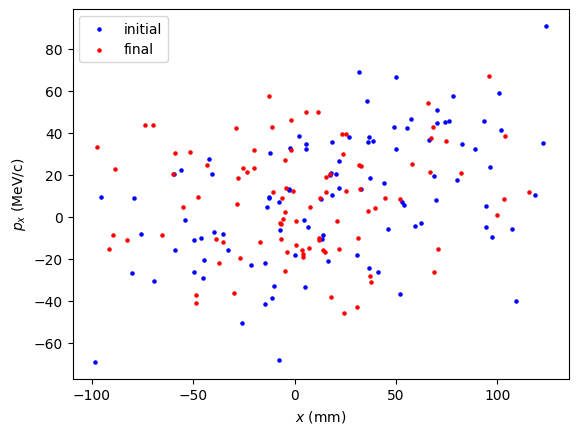

In [4]:
# Plot px vs x:
point_size = 5
plt.scatter(xi,pxi,color='blue',label='initial',s=point_size)
plt.scatter(xf,pxf,color='red',label='final',s=point_size)
plt.xlabel('$x$ (mm)')
plt.ylabel('$p_x$ (MeV/c)')
plt.legend()
plt.show()

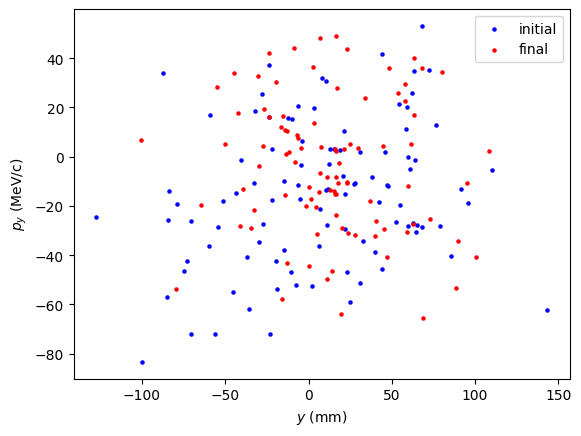

In [5]:
# Plot py vs y:
plt.scatter(yi,pyi,color='blue',label='initial',s=point_size)
plt.scatter(yf,pyf,color='red',label='final',s=point_size)
plt.xlabel('$y$ (mm)')
plt.ylabel('$p_y$ (MeV/c)')
plt.legend()
plt.show()

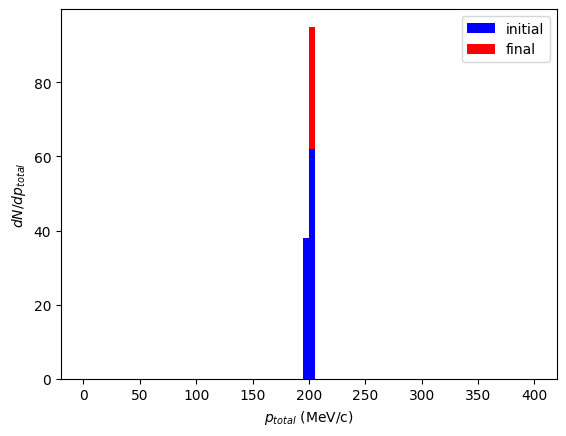

In [6]:
# Plot total p distribution:
plt.hist(ptotali,color='blue',label='initial',range=(0,400),bins=80,zorder=1) # bins of 5
plt.hist(ptotalf,color='red',label='final',range=(0,400),bins=80,zorder=0)
plt.xlabel('$p_{total}$ (MeV/c)')
plt.ylabel('$dN/dp_{total}$')
plt.legend()
plt.show()

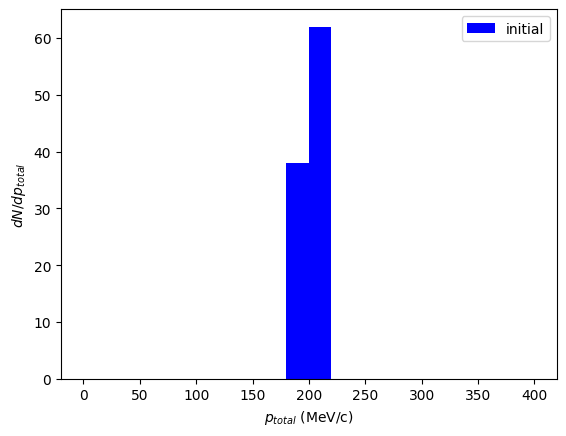

In [7]:
# Plot total p distribution:
plt.hist(ptotali,color='blue',label='initial',range=(0,400),bins=20)
plt.xlabel('$p_{total}$ (MeV/c)')
plt.ylabel('$dN/dp_{total}$')
plt.legend()
plt.show()

In [8]:
# Values for all detectors:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []
t_vals = []
position = []
EventIDs = []
Lz_vals = []
# for j in range(5):
for j in range(30):

    # Load data from output txt files:
    # data = np.loadtxt('out'+str(j+1)+'.txt')
    data = np.loadtxt('det'+str(j)+'.txt')

    # Values for each detector:
    x = []; y = []; z = []
    px = []; py = []; pz = []
    t = []
    EventID = []
    Lz = []
    for i in range(data.shape[0]):
        x_val = data[i][0]; y_val = data[i][1]
        x.append(x_val) # mm
        y.append(y_val)
        z.append(data[i][2])
        px_val = data[i][3]; py_val = data[i][4]
        px.append(px_val) # MeV/c
        py.append(py_val)
        pz.append(data[i][5])
        t.append(data[i][6]) # ns
        EventID.append(data[i][8])
        Lz.append(x_val*py_val-y_val*px_val)

    # Values for entire channel:
    x_vals.append(x)
    y_vals.append(y)
    z_vals.append(z)
    px_vals.append(px)
    py_vals.append(py)
    pz_vals.append(pz)
    t_vals.append(t)
    position.append(z[0])
    EventIDs.append(EventID)
    Lz_vals.append(Lz)

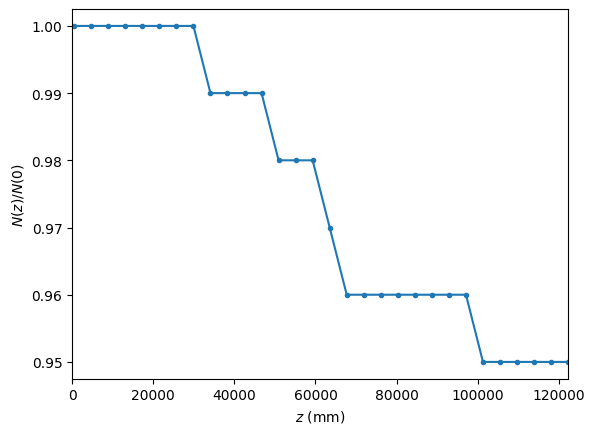

In [9]:
# Plot transmission rate along z:
plt.plot(position,[(len(i)/len(x_vals[0])) for i in x_vals], marker='.')
# plt.ylim(0,1)
plt.xlim(0,max(position))
plt.xlabel('$z$ (mm)')
plt.ylabel('$N(z)/N(0)$')
plt.show()

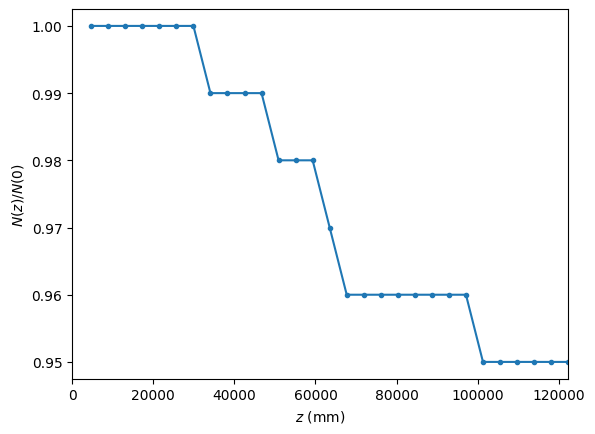

In [10]:
# Plot transmission rate along z:
loss = [(len(i)/len(x_vals[0])) for i in x_vals[1:]]
loss = loss/np.max(loss)
plt.plot(position[1:],loss, marker='.')
plt.xlim(0,max(position))
plt.xlabel('$z$ (mm)')
plt.ylabel('$N(z)/N(0)$')
plt.show()

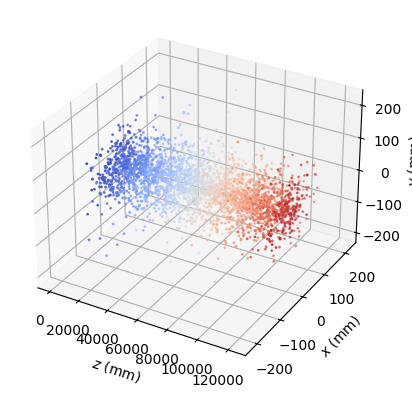

In [11]:
# 3D plot of x, y distribution at each detector:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
cmap = plt.get_cmap('coolwarm')
for i in range(len(position)):
    color = cmap(i/len(position))
    ax.scatter(position[i],x_vals[i],y_vals[i],color=color,s=1)
ax.set_xlabel('$z$ (mm)')
ax.set_ylabel('$x$ (mm)')
ax.set_zlabel('$y$ (mm)')
plt.show()

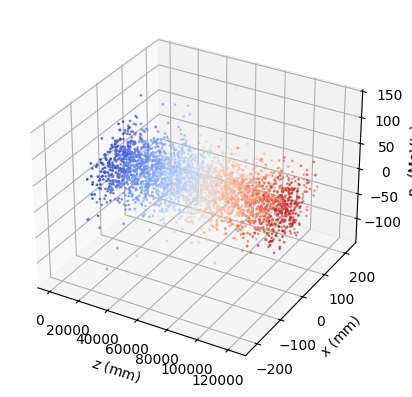

In [12]:
# 3D plot of phase space (x) distribution at each detector:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
cmap = plt.get_cmap('coolwarm')
for i in range(len(position)):
    color = cmap(i/len(position))
    ax.scatter(position[i],x_vals[i],px_vals[i],color=color,s=1)
ax.set_xlabel('$z$ (mm)')
ax.set_ylabel('$x$ (mm)')
ax.set_zlabel('$p_x$ (MeV/c)')
plt.show()

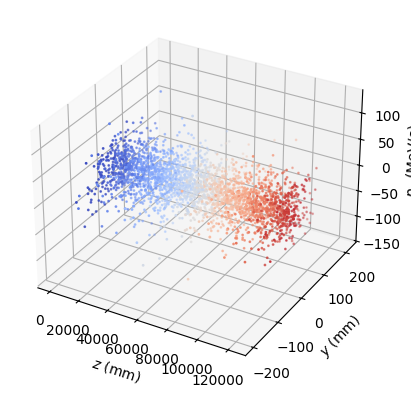

In [14]:
# 3D plot of phase space (y) distribution at each detector:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
cmap = plt.get_cmap('coolwarm')
for i in range(len(position)):
    color = cmap(i/len(position))
    ax.scatter(position[i],y_vals[i],py_vals[i],color=color,s=1)
ax.set_xlabel('$z$ (mm)')
ax.set_ylabel('$y$ (mm)')
ax.set_zlabel('$p_y$ (MeV/c)')
plt.show()